In [1]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("Biedap/input"))

import zipfile

with zipfile.ZipFile("Biedap/input/train.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("Biedap/input/test1.zip","r") as z:
    z.extractall(".")

# Any results you write to the current directory are saved as output.


2022-12-05 23:24:19.525108: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 23:24:19.670858: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mosquito/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-12-05 23:24:19.670876: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-05 23:24:20.414074: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; d

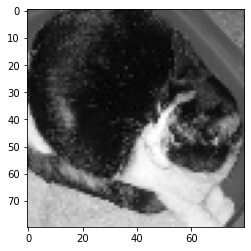

In [2]:
main_dir = "Biedap"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [3]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)   

In [4]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [5]:
X = X/255.0

In [6]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

2022-12-05 23:24:40.180280: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 23:24:40.180611: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mosquito/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-12-05 23:24:40.180666: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mosquito/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-12-05 23:24:40.180712: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Coul

In [7]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
101/625 [===>..........................] - ETA: 1:04 - loss: 0.6977 - accuracy: 0.5309

KeyboardInterrupt: 

In [ ]:
train_dir = "test1"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predicted_val = [int(round(p[0])) for p in predictions]

In [ ]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [ ]:
submission_df.to_csv("submission.csv", index=False)